# **Library Imports**

In [1]:
!pip install imbalanced-learn

In [41]:
# Importing Core libraries for data manipulation and visualization
import pandas as pd  # For handling datasets
import numpy as np  # For numerical operations
import matplotlib.pyplot as plt  # For creating visualizations
import seaborn as sns  # For advanced visualizations

# Importing libraries for machine learning and evaluation
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV  # For splitting data and hyperparameter tuning
from imblearn.combine import SMOTETomek  # Balancing for numerical data
from imblearn.over_sampling import SMOTENC  # Balancing for categorical features
from sklearn.preprocessing import RobustScaler  # For feature scaling
from sklearn.metrics import f1_score, classification_report, confusion_matrix, roc_curve, auc, ConfusionMatrixDisplay, RocCurveDisplay, roc_auc_score  # For evaluating models
from sklearn.ensemble import VotingClassifier  #  Voting Classifier Model
from sklearn.linear_model import LogisticRegression  # Logistic Regression model
from sklearn.tree import DecisionTreeClassifier  # Decision Tree model
from sklearn.ensemble import RandomForestClassifier  # Random Forest model
from sklearn.ensemble import GradientBoostingClassifier  # Gradient Boosting model
from sklearn.svm import SVC  # Support Vector Machine Model
from sklearn.naive_bayes import GaussianNB  # Naive Bayes Model
from sklearn.neighbors import KNeighborsClassifier  # KNN
from sklearn.neural_network import MLPClassifier  # Multi-Layer Perceptron (Neural Network) Model

# Importing libraries for deep learning
from tensorflow.keras.models import Sequential  # Sequential Model for Deep Learning
from tensorflow.keras.layers import Dense, Dropout  # Layers for the Deep Learning Model

# Importing files directly into Colab
from google.colab import files

# Setting Random Seed
randomSeed = 1805

# Setting Visualization Styles for Consistency

# Applying a global style for Matplotlib
plt.style.use('seaborn-v0_8-darkgrid')  # Use a valid style for Matplotlib

# Setting Seaborn theme
sns.set_theme(style='darkgrid')  # Use a matching grid style for Seaborn plots

# Adjusting font sizes for better readability
sns.set_context("notebook", font_scale=1.2)  # Scale font sizes appropriately for a notebook

# Defining a consistent color palette
sns.set_palette("Set2")  # Use a soft pastel color palette for clarity


# **Loading and Previewing the Heart Disease Dataset**

In [3]:
# Uploading the dataset
uploaded = files.upload()

# Loading the dataset using Pandas
heartDisease = pd.read_csv('heartDisease.csv', sep = ';')

Saving heartDisease.csv to heartDisease.csv


Preview of the dataset:

In [4]:
heartDisease.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


Display of the basic information about the dataset:

In [5]:
heartDisease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


Display of the statistics summary for numerical columns



In [6]:
heartDisease[['age', 'height', 'weight', 'ap_hi', 'ap_lo']].describe()

,age,height,weight,ap_hi,ap_lo
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,19468.865814,164.359229,74.205690,128.817286,96.630414
std,2467.251667,8.210126,14.395757,154.011419,188.472530
min,10798.000000,55.000000,10.000000,-150.000000,-70.000000
25%,17664.000000,159.000000,65.000000,120.000000,80.000000
50%,19703.000000,165.000000,72.000000,120.000000,80.000000
75%,21327.000000,170.000000,82.000000,140.000000,90.000000
max,23713.000000,250.000000,200.000000,16020.000000,11000.000000


**Observations on Numerical Features**

1. **Age**:
   - Mean: about 19,469 days (~53 years).
   - Min: 10,798 days (~29 years), which seems reasonable for this dataset.
   - Max: 23,713 days (~65 years), also reasonable.

2. **Height**:
   - Mean: ~164 cm.
   - Min: 55 cm—this might represent an outlier or data entry error.
   - Max: 250 cm—this is likely unrealistic and should be addressed in preprocessing.

3. **Weight**:
   - Mean: ~74 kg.
   - Min: 10 kg—this is extremely low and likely an error.
   - Max: 200 kg—could be a valid extreme, but worth investigating.

4. **Systolic Blood Pressure (`ap_hi`)**:
   - Mean: ~128.
   - Min: -150—negative values are invalid and need correction.
   - Max: 16,020—this is a clear outlier and likely a data entry error.

5. **Diastolic Blood Pressure (`ap_lo`)**:
   - Mean: ~96.
   - Min: -70—negative values are invalid and need correction.
   - Max: 11,000—this is an extreme outlier and likely a data entry error.

**Feature Categories:**

The features in this dataset are divided into three main categories based on the type of information they provide:

- Objective Features:
These are factual and directly measurable attributes of the patient, such as age, height, and weight.
They are not influenced by the patient’s perception or behavior but reflect objective physical characteristics.

- Examination Features:
These are results obtained from medical tests and examinations, such as blood pressure, cholesterol levels, and glucose levels.
These features provide critical insights into the patient's current health conditions.

- Subjective Features:
These are self-reported behaviors or lifestyle attributes provided by the patient, such as smoking habits, alcohol consumption, and physical activity levels.
Since these are based on the patient’s input, they may be prone to personal biases or inaccuracies.

- Target Variable:
The dataset includes a binary target variable (cardio) that indicates whether the patient has cardiovascular disease (1) or not (0).

**Column Descriptions:**

OBJECTIVE FEATURES:

- id: This is a unique identifier for each patient. It does not hold any medical significance but is useful for indexing. (Data type: Integer)

- age: The age of the patient in days. This is an objective feature providing factual information about the patient. (Data type: Integer)

- gender: This is a categorical variable representing the patient's gender. The values are encoded as 1 for female and 2 for male. (Data type: Categorical)

- height: The height of the patient measured in centimeters. This is an objective feature. (Data type: Integer)

- weight: The weight of the patient measured in kilograms. This is an objective feature. (Data type: Float)

EXAMINATION FEATURES:

- ap_hi: Systolic blood pressure (the higher number in a blood pressure reading). This is an examination feature obtained from medical tests. (Data type: Integer)

- ap_lo: Diastolic blood pressure (the lower number in a blood pressure reading). This is also an examination feature. (Data type: Integer)

- cholesterol: This is a categorical variable representing cholesterol levels. The values are:

1: Normal
2: Above normal
3: Well above normal This is an examination feature. (Data type: Categorical)

- gluc: This is a categorical variable representing glucose levels. The values are:

1: Normal
2: Above normal
3: Well above normal This is also an examination feature. (Data type: Categorical)

SUBJECTIVE FEATURES:

- smoke: This is a binary variable indicating whether the patient smokes. The values are:

0: No
1: Yes This is a subjective feature provided by the patient. (Data type: Binary)

- alco: This is a binary variable indicating whether the patient consumes alcohol. The values are:

0: No
1: Yes This is a subjective feature. (Data type: Binary)

- active: This is a binary variable indicating whether the patient is physically active. The values are:

0: No
1: Yes This is a subjective feature. (Data type: Binary)

TARGET FEATURE:

- cardio: This is the target variable representing the presence or absence of cardiovascular disease. The values are:

0: No (absence of cardiovascular disease)
1: Yes (presence of cardiovascular disease) This is the classification target for the machine learning model. (Data type: Binary)

# **EDA**

Rename the columns for clarity

In [7]:
heartDisease = heartDisease.rename(columns={
    'id': 'patientId',
    'age': 'age(days)',
    'gender': 'sex',
    'height': 'height(cm)',
    'weight': 'weight(kg)',
    'ap_hi': 'systolicBloodPressure',
    'ap_lo': 'diastolicBloodPressure',
    'cholesterol': 'cholesterolLevel',
    'gluc': 'glucoseLevel',
    'smoke': 'smokingStatus',
    'alco': 'alcoholConsumption',
    'active': 'physicalActivity',
    'cardio': 'cardiovascularDisease'
})

**Distribution of Numerical Features**

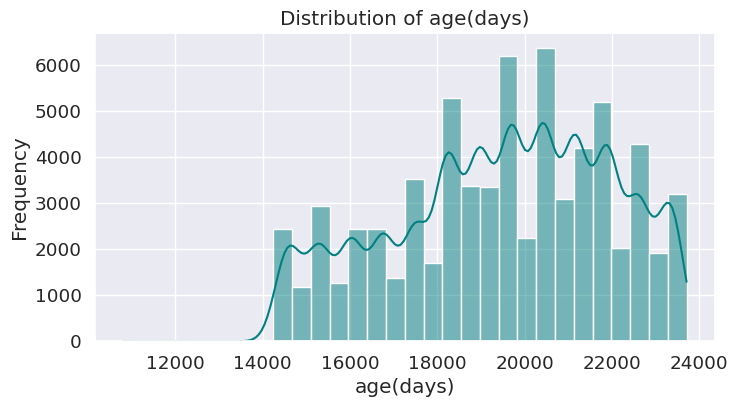

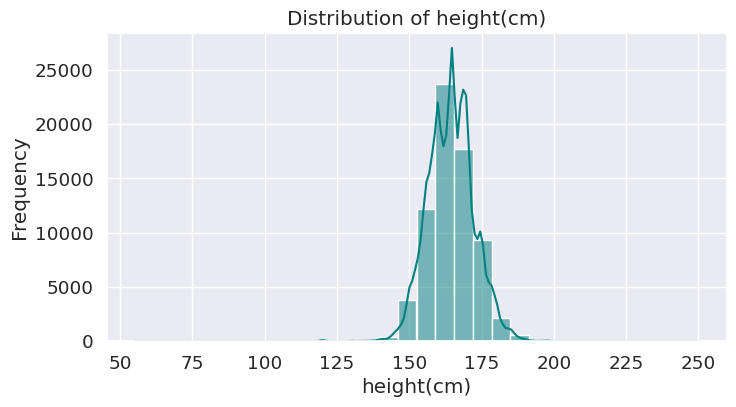

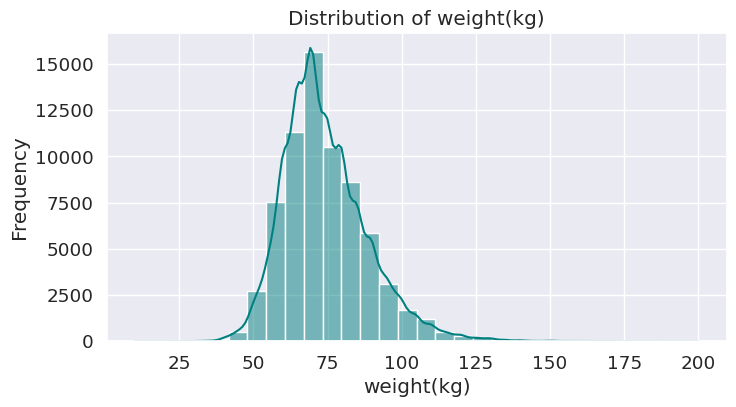

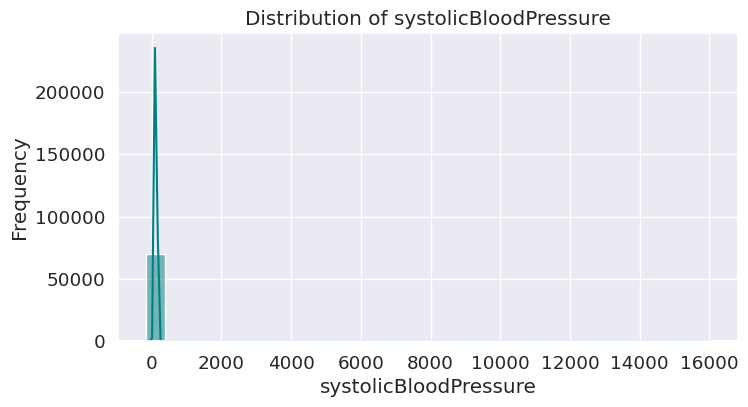

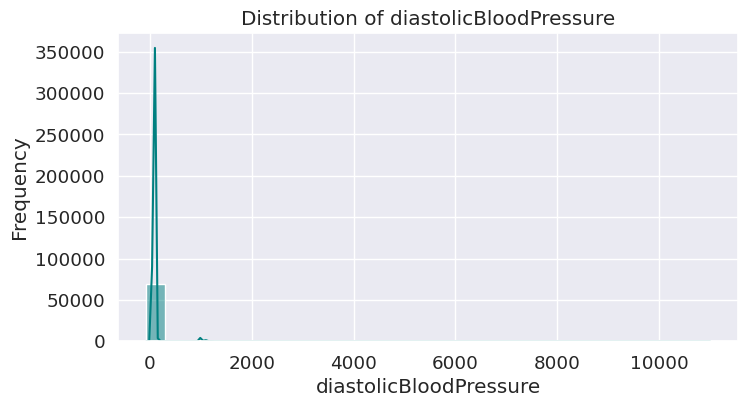

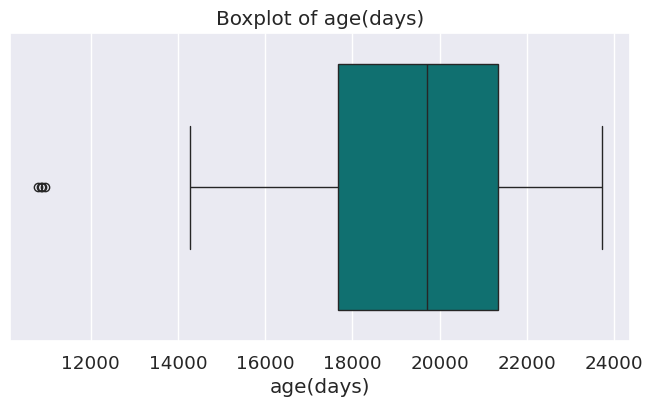

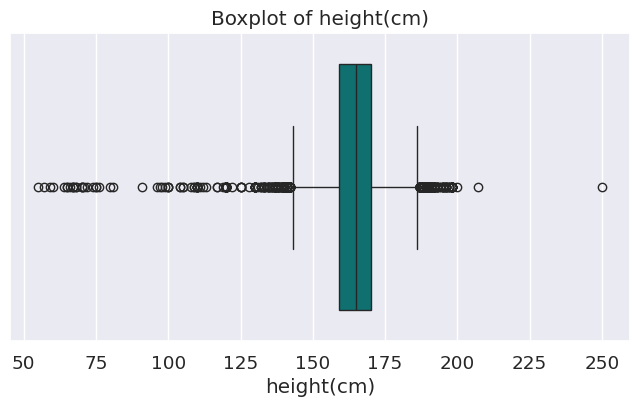

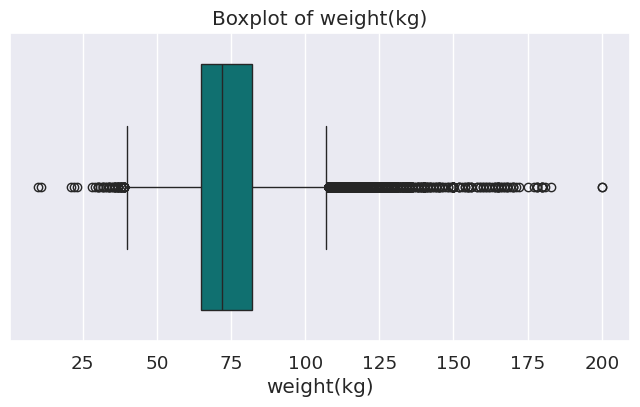

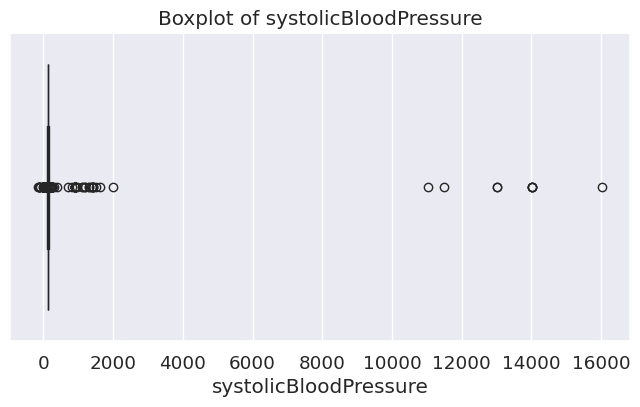

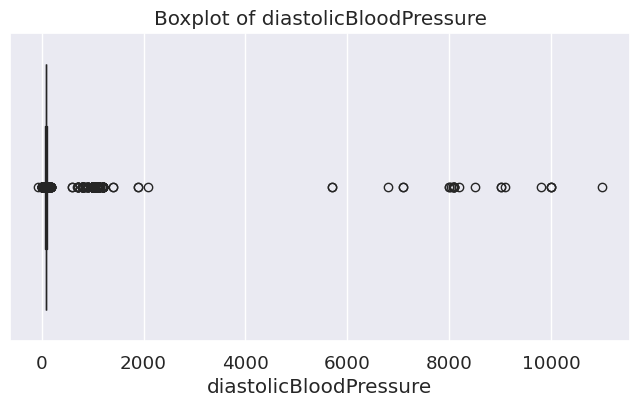

In [8]:
numericalFeatures = ['age(days)', 'height(cm)', 'weight(kg)', 'systolicBloodPressure', 'diastolicBloodPressure']

# Plot histograms
for feature in numericalFeatures:
    plt.figure(figsize=(8, 4))
    sns.histplot(data=heartDisease, x=feature, kde=True, bins=30, color='teal')
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.show()

# Plot boxplots to detect outliers
for feature in numericalFeatures:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=heartDisease, x=feature, color='teal')
    plt.title(f"Boxplot of {feature}")
    plt.xlabel(feature)
    plt.show()


- Age (age(days)):
  - Distribution:
    - The age data is roughly uniform, with most patients in the range of 40–65 years (converted from days).
    - Few outliers exist at the lower and higher ends, representing very young or old patients.
  - Boxplot:
    - Outliers are visible below ~29 years (around 10,000 days), which might represent edge cases or errors.
  - Insights:
    - Most patients are middle-aged or elderly, which aligns with the target population for cardiovascular disease.
    - Consider converting age(days) into age(years) for better interpretability.
    - Remove unrealistic outliers (very young patients).
- Height (height(cm)):
  - Distribution:
    - The majority of patients fall between 150–180 cm, with a peak around 165 cm.
    - There are extreme values below 100 cm and above 200 cm.
  - Boxplot:
    - Outliers exist at both ends, with some patients recorded below 100 cm or above 200 cm. Extreme cases like 250 cm need validation.
  - Insights:
    - Heights below 100 cm and above 200 cm should be flagged as potential errors or edge cases.
- Weight (weight(kg)):
  - Distribution:
    - The data shows a skewed distribution, with most weights between 50–100 kg, peaking around 75 kg.
    - Extreme values (below 25 kg or above 150 kg) are present.
  - Boxplot:
    - Significant outliers exist at both ends, particularly weights below 25 kg and above 200 kg.
  - Insights:
    - Extreme weights (below 30 kg or above 150 kg) should be treated as outliers, as they are likely errors.
    - The skewed distribution indicates that scaling might be necessary for model inputs.
- Systolic Blood Pressure (systolicBloodPressure):
  - Distribution:
    - The distribution is heavily right-skewed, with most values in a reasonable range (120–140).
    - Extreme outliers are evident, with values exceeding 10,000.
  - Boxplot:
    - Outliers dominate the plot, suggesting significant errors or misentries.
  - Insights:
    - Blood pressures above 200 mmHg are likely unrealistic and should be capped or removed.
    - A log transformation might help normalize the distribution.
- Diastolic Blood Pressure (diastolicBloodPressure):
  - Distribution:
    - Similar to systolic pressure, most values cluster within a reasonable range (70–90), but extreme outliers exist.
    - Values exceeding 10,000 are clearly invalid.
  - Boxplot:
      - The presence of extreme outliers indicates potential data entry errors.
  - Insights:
    - Diastolic pressures above 150 mmHg should be capped or removed.
    - A similar log transformation as systolic pressure may help with normalization.

**General Action Plan**
- Outlier Treatment:

    - Define realistic bounds for each feature using domain knowledge:
      - Height: 100–200 cm.
      - Weight: 30–150 kg.
      - Systolic BP: 90–200 mmHg.
      - Diastolic BP: 60–150 mmHg.
      - Remove or impute values outside these bounds.
- Scaling:

  - Apply standardization or normalization to ensure all numerical features contribute equally to the model.
- Transformations:

    - Convert age(days) to age(years) for interpretability.
    - Apply log transformations to highly skewed features like blood pressure to reduce the effect of extreme outliers.

**Categorical Feature Distributions**

<ipython-input-9-0f9a78623076>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=heartDisease, x=feature, palette='Set2')


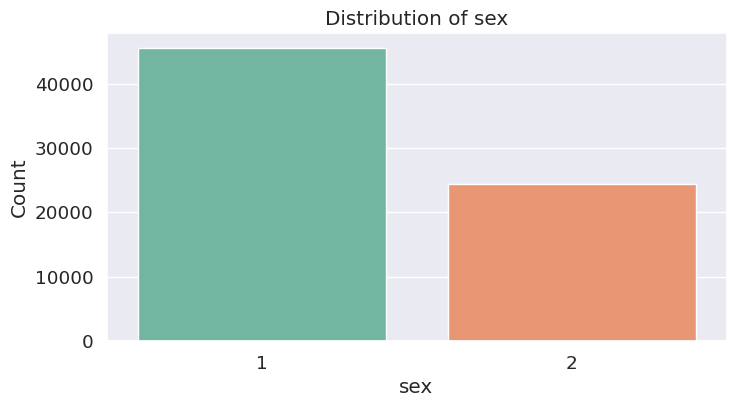

<ipython-input-9-0f9a78623076>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=heartDisease, x=feature, palette='Set2')


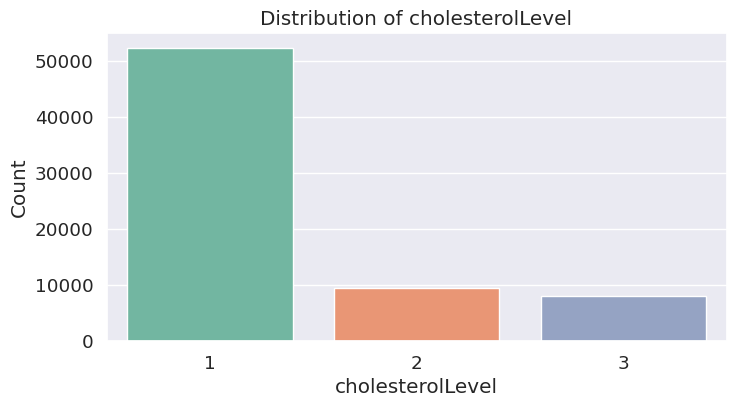

<ipython-input-9-0f9a78623076>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=heartDisease, x=feature, palette='Set2')


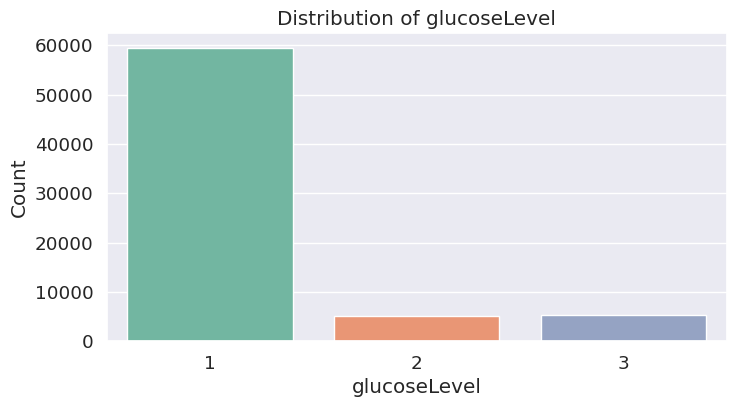

<ipython-input-9-0f9a78623076>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=heartDisease, x=feature, palette='Set2')


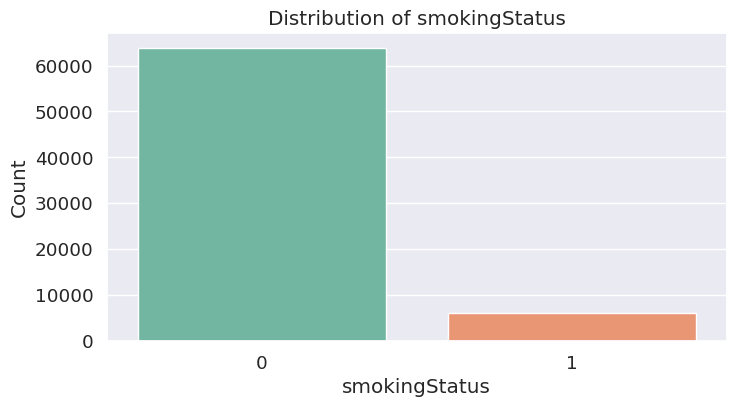

<ipython-input-9-0f9a78623076>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=heartDisease, x=feature, palette='Set2')


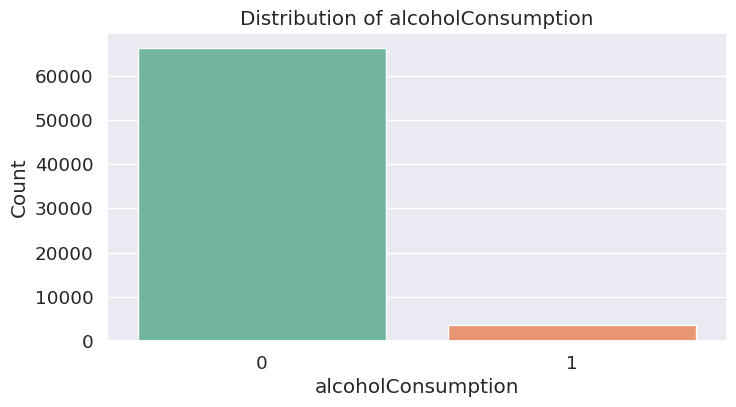

<ipython-input-9-0f9a78623076>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=heartDisease, x=feature, palette='Set2')


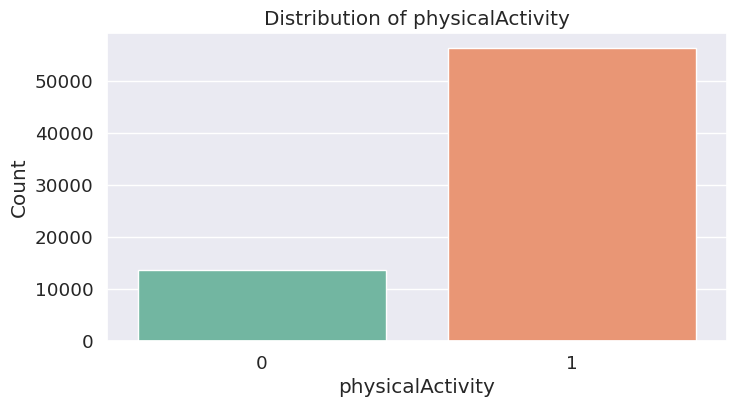

In [9]:
categoricalFeatures = ['sex', 'cholesterolLevel', 'glucoseLevel', 'smokingStatus', 'alcoholConsumption', 'physicalActivity']

# Plot bar plots
for feature in categoricalFeatures:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=heartDisease, x=feature, palette='Set2')
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.show()

**Correlation Heatmap**

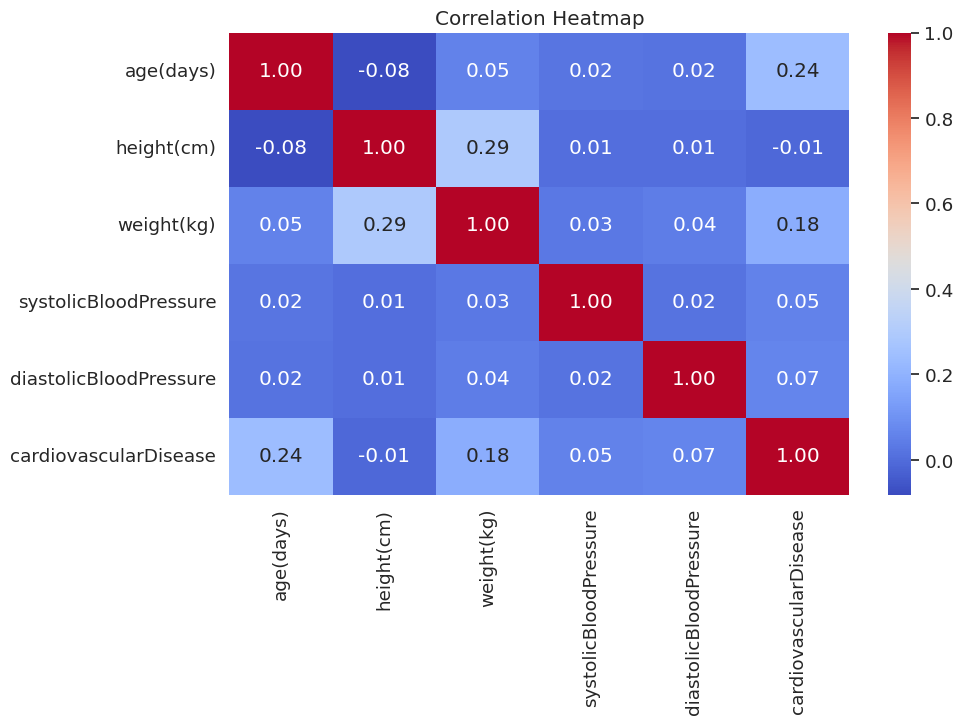

In [10]:
# Compute correlation matrix
correlationMatrix = heartDisease[numericalFeatures + ['cardiovascularDisease']].corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlationMatrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()


**Key Observations:**
- Age vs. Cardiovascular Disease (0.24):

  - Moderate positive correlation: As age increases, the likelihood of cardiovascular disease also increases.
  - This is consistent with medical understanding, where aging is a major risk factor due to wear and tear on the cardiovascular system.

- Weight vs. Cardiovascular Disease (0.18):

  - Weak positive correlation: Higher weight may slightly increase the likelihood of cardiovascular disease.
  - This aligns with obesity being a potential risk factor, but other factors like cholesterol and blood pressure likely mediate this relationship.

- Systolic Blood Pressure vs. Cardiovascular Disease (0.05):

  - Minimal correlation: While elevated systolic blood pressure is known to be a risk factor, the weak correlation suggests the dataset might include noise or outliers affecting this relationship.

- Diastolic Blood Pressure vs. Cardiovascular Disease (0.07):

  - Minimal correlation: Similar to systolic pressure, the weak correlation may be due to data inconsistencies or outliers. Blood pressure is still clinically significant and warrants attention during preprocessing.

- Height vs. Cardiovascular Disease (-0.01):

  - No meaningful correlation: Height does not seem to influence cardiovascular disease likelihood in this dataset. This makes sense as height is not typically a direct factor for cardiovascular health.

- Feature Interrelationships:

  - Height and Weight (0.29):
    - Positive correlation: Taller individuals tend to weigh more.
  - Systolic and Diastolic Blood Pressure (0.04):
    - Weak correlation: Despite being part of the same measurement, the relationship is weaker than expected, potentially due to data inconsistencies.
    
**Insights:**
- Predictive Features:

  - Age and weight show stronger correlations with cardiovascular disease and are likely to contribute meaningfully to the model.
  - Blood pressure values (systolicBloodPressure and diastolicBloodPressure) have weaker correlations but are still clinically significant. They should be retained but cleaned for outliers.
- Non-Predictive Feature:

  - Height has a negligible correlation with cardiovascular disease and might not be necessary for modeling.
- Multicollinearity:

  - No evidence of multicollinearity in this dataset since no features are strongly correlated with one another (all inter-feature correlations are ≤ 0.3).

**Suggested Actions:**
- Outlier Treatment:
  - Investigate and handle outliers in blood pressure values to better capture their relationship with cardiovascular disease.
- Feature Selection:
  - Retain age, weight, systolicBloodPressure, and diastolicBloodPressure for modeling based on clinical significance and correlations.
  - Consider dropping height as it seems to be a weak indicator.


**Categorical Features vs Target**

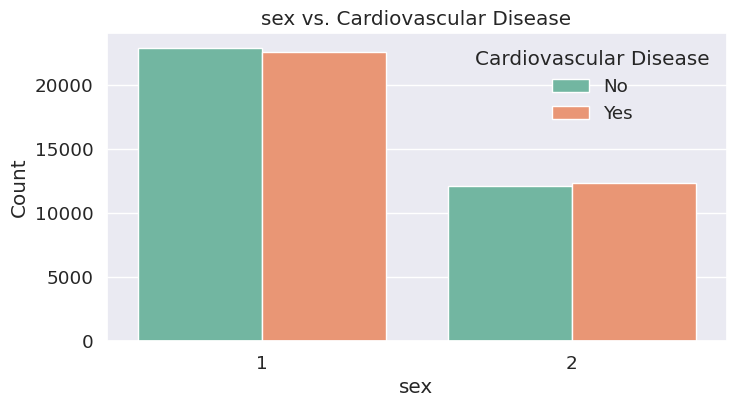

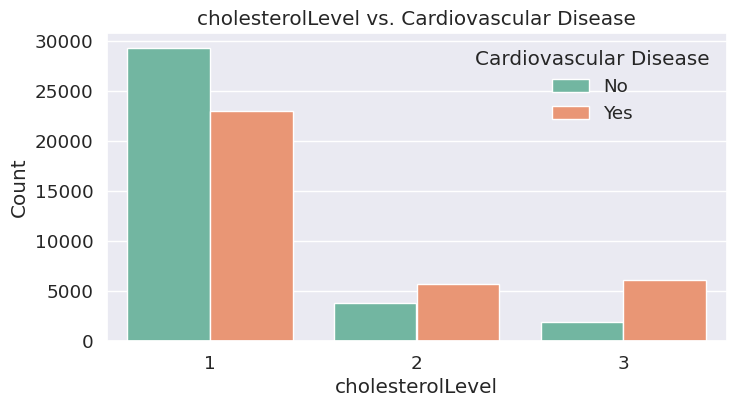

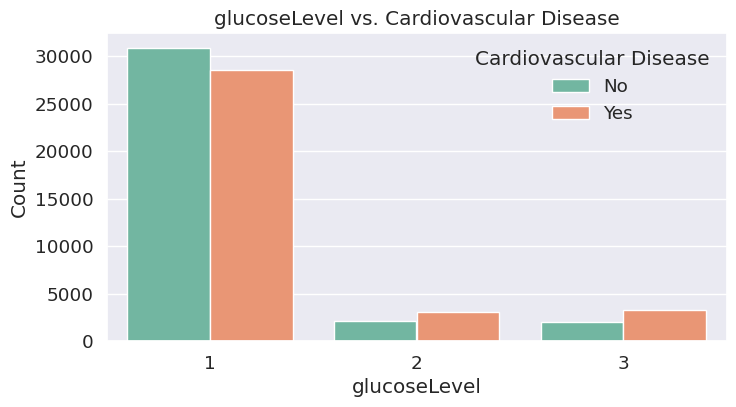

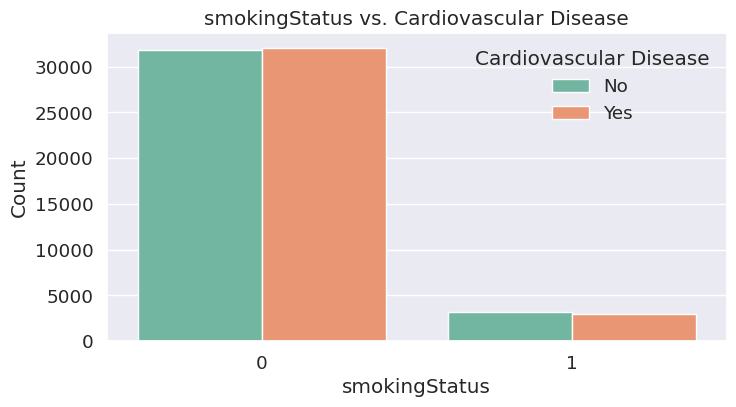

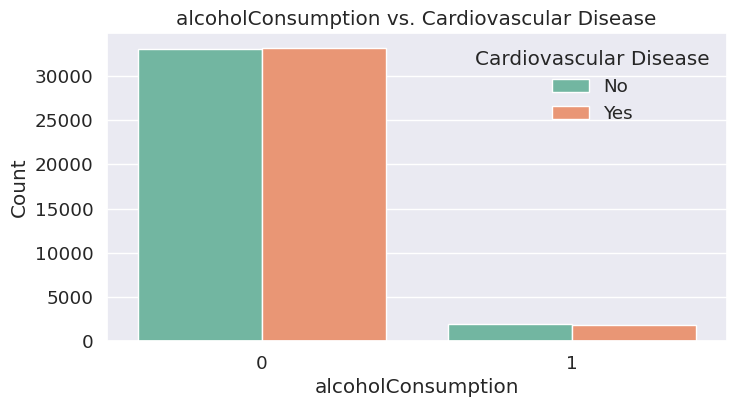

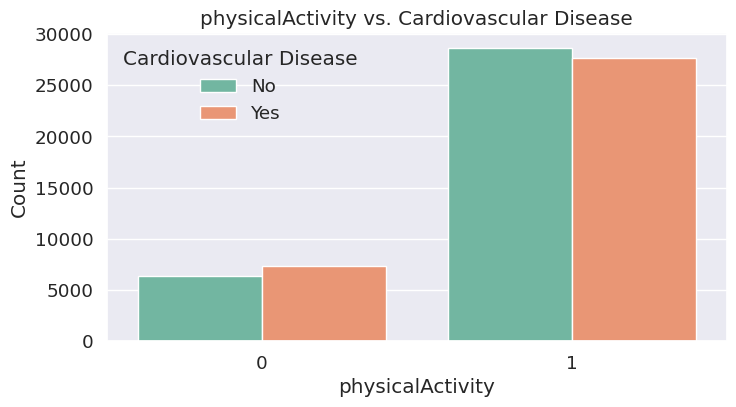

In [11]:
# Plot target distribution for each categorical feature
for feature in categoricalFeatures:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=heartDisease, x=feature, hue='cardiovascularDisease', palette='Set2')
    plt.title(f"{feature} vs. Cardiovascular Disease")
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.legend(title='Cardiovascular Disease', labels=['No', 'Yes'])
    plt.show()


- Sex vs. Cardiovascular Disease
  - Observation:
    - Both sexes (1 = female, 2 = male) have a significant portion of individuals with cardiovascular disease.
    - Men (2) show a slightly higher prevalence of cardiovascular disease compared to women (1).
  - Insight:
    - Male patients are marginally more likely to develop cardiovascular disease, aligning with known medical trends.
- Glucose Level vs. Cardiovascular Disease
  - Observation:
    - Patients with normal glucose levels (1) are the majority, but those with higher glucose levels (2 and 3) have a noticeably higher proportion of cardiovascular disease.
  - Insight:
    - Elevated glucose levels, often indicative of diabetes, are a risk factor for cardiovascular disease.
    - This feature is valuable for distinguishing high-risk individuals.
- Cholesterol Level vs. Cardiovascular Disease
  - Observation:
    - Most patients have normal cholesterol levels (1), but higher levels (2 and 3) show an increasing proportion of cardiovascular disease.
  - Insight:
    - Elevated cholesterol levels are strongly associated with cardiovascular disease, reinforcing their predictive importance.
- Smoking Status vs. Cardiovascular Disease
  - Observation:
    - Non-smokers (0) are the majority, and smokers (1) represent a smaller group.
    - Both groups have comparable proportions of cardiovascular disease, though the dataset might lack sufficient detail to identify smoking-related effects clearly.
  - Insight:
    - Smoking status appears to have a weaker association with cardiovascular disease, potentially due to data limitations or underreporting.
- Alcohol Consumption vs. Cardiovascular Disease
  - Observation:
    - Most patients do not consume alcohol (0), meaning alcohol consumers (1) are a minority.
    - Both groups have similar proportions of cardiovascular disease.
  - Insight:
    - Alcohol consumption does not show a strong association with cardiovascular disease in this dataset.
- Physical Activity vs. Cardiovascular Disease
  - Observation:
    - Physically active individuals (1) are the majority, with lower activity levels (0) representing a smaller group.
    - Inactive patients (0) have a noticeably higher proportion of cardiovascular disease.
  - Insight:
    - Physical inactivity is a clear risk factor for cardiovascular disease, consistent with established health guidelines.

**General Insights Across Categorical Features**
- Strong Predictors:

  - Cholesterol Level and Glucose Level have clear patterns of increased cardiovascular disease prevalence as their levels rise.
  - Physical Activity also shows a strong relationship, where inactivity correlates with a higher risk.
- Weaker Predictors:

  - Smoking Status and Alcohol Consumption appear less influential, possibly due to underrepresentation or less detailed data.
- Sex Differences:

  - Male patients show a slightly higher risk, but the differences are subtle, suggesting sex alone may not be a strong predictor.
  

**Age (in Years) vs Target**

Covert age from being in days to being in years

In [12]:
# Convert age from days to years (rounded to one decimal place)
heartDisease['age(years)'] = (heartDisease['age(days)'] / 365.25).round(1)

# Drop the original age(days) column
heartDisease = heartDisease.drop(columns=['age(days)'])

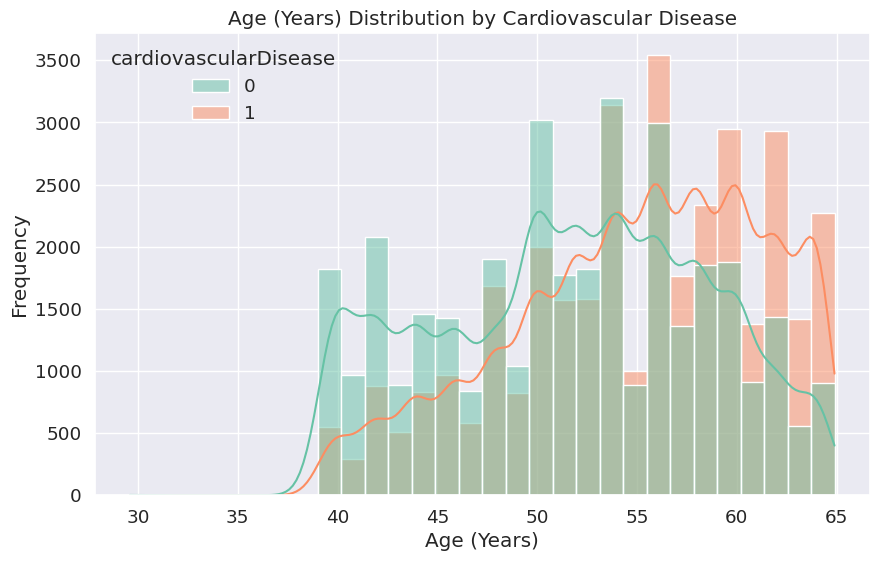

In [13]:
# Plot age distribution by target
plt.figure(figsize=(10, 6))
sns.histplot(data=heartDisease, x='age(years)', hue='cardiovascularDisease', kde=True, bins=30, palette='Set2')
plt.title("Age (Years) Distribution by Cardiovascular Disease")
plt.xlabel("Age (Years)")
plt.ylabel("Frequency")
plt.show()


# **Data Preprocessing**

Check if there is any null values

In [14]:
heartDisease.isnull().sum()

,0
patientId,0
sex,0
height(cm),0
weight(kg),0
systolicBloodPressure,0
diastolicBloodPressure,0
cholesterolLevel,0
glucoseLevel,0
smokingStatus,0
alcoholConsumption,0


No missing values no need for any actions

**Addressing Outliers**

- Height (height(cm))
  - Normal human height ranges between approximately 100 cm and 200 cm for adults.
- Weight (weight(kg))
  - Typical adult weights range between 30 kg (extremely underweight) and 150 kg (extremely obese). Values outside this range could represent unrealistic entries or edge cases.
- Systolic Blood Pressure (systolicBloodPressure)
  - Normal systolic blood pressure ranges between 90 mmHg and 140 mmHg.
  - Hypertension might extend the upper limit to 200 mmHg, which is still medically relevant.
  - Negative values are impossible, and extremely high values are likely data entry errors.
- Diastolic Blood Pressure (diastolicBloodPressure)
  - Normal diastolic blood pressure ranges between 60 mmHg and 90 mmHg.
  - Hypertension might extend the upper limit to 150 mmHg.
  - Negative values or extremely high values are clearly errors.

  **Overall any data that would not generalize well with the models have been removed to increase accuracy**

In [15]:
heartDisease = heartDisease[
    (heartDisease['height(cm)'] >= 100) & (heartDisease['height(cm)'] <= 200) &
    (heartDisease['weight(kg)'] >= 30) & (heartDisease['weight(kg)'] <= 150) &
    (heartDisease['systolicBloodPressure'] >= 90) & (heartDisease['systolicBloodPressure'] <= 200) &
    (heartDisease['diastolicBloodPressure'] >= 60) & (heartDisease['diastolicBloodPressure'] <= 150)
]

In [16]:
heartDisease.info()

<class 'pandas.core.frame.DataFrame'>
Index: 68388 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   patientId               68388 non-null  int64  
 1   sex                     68388 non-null  int64  
 2   height(cm)              68388 non-null  int64  
 3   weight(kg)              68388 non-null  float64
 4   systolicBloodPressure   68388 non-null  int64  
 5   diastolicBloodPressure  68388 non-null  int64  
 6   cholesterolLevel        68388 non-null  int64  
 7   glucoseLevel            68388 non-null  int64  
 8   smokingStatus           68388 non-null  int64  
 9   alcoholConsumption      68388 non-null  int64  
 10  physicalActivity        68388 non-null  int64  
 11  cardiovascularDisease   68388 non-null  int64  
 12  age(years)              68388 non-null  float64
dtypes: float64(2), int64(11)
memory usage: 7.3 MB


1612 records have been removed which is not alot and should help with the data generalizability

**Apply Scaling**

Machine learning algorithms like logistic regression, SVMs, and neural networks are sensitive to the scale of input features. Features with larger scales may dominate the optimization process, leading to suboptimal models. Scaling ensures that all features contribute equally to the model.


RobustScaler was chosen because the dataset contains significant outliers, particularly in features like systolicBloodPressure and diastolicBloodPressure.Unlike StandardScaler or MinMaxScaler, RobustScaler uses the median and interquartile range (IQR), making it less sensitive to extreme values. This ensures a more reliable scaling for datasets with outliers, preserving meaningful feature distributions.

In [17]:
featuresToScale = ['age(years)', 'height(cm)', 'weight(kg)', 'systolicBloodPressure', 'diastolicBloodPressure']
scaler = RobustScaler()
heartDisease[featuresToScale] = scaler.fit_transform(heartDisease[featuresToScale])
heartDisease[featuresToScale].describe()

,age(years),height(cm),weight(kg),systolicBloodPressure,diastolicBloodPressure
count,68388.000000,68388.000000,68388.000000,68388.000000,68388.000000
mean,-0.060461,-0.054490,0.121750,0.332374,0.136302
std,0.675479,0.723360,0.827819,0.820915,0.934290
min,-2.430000,-5.909091,-2.470588,-1.500000,-2.000000
25%,-0.550000,-0.545455,-0.411765,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.450000,0.454545,0.588235,1.000000,1.000000
max,1.100000,3.000000,4.588235,4.000000,7.000000


**Visualizing the impact of scaling with boxplots**

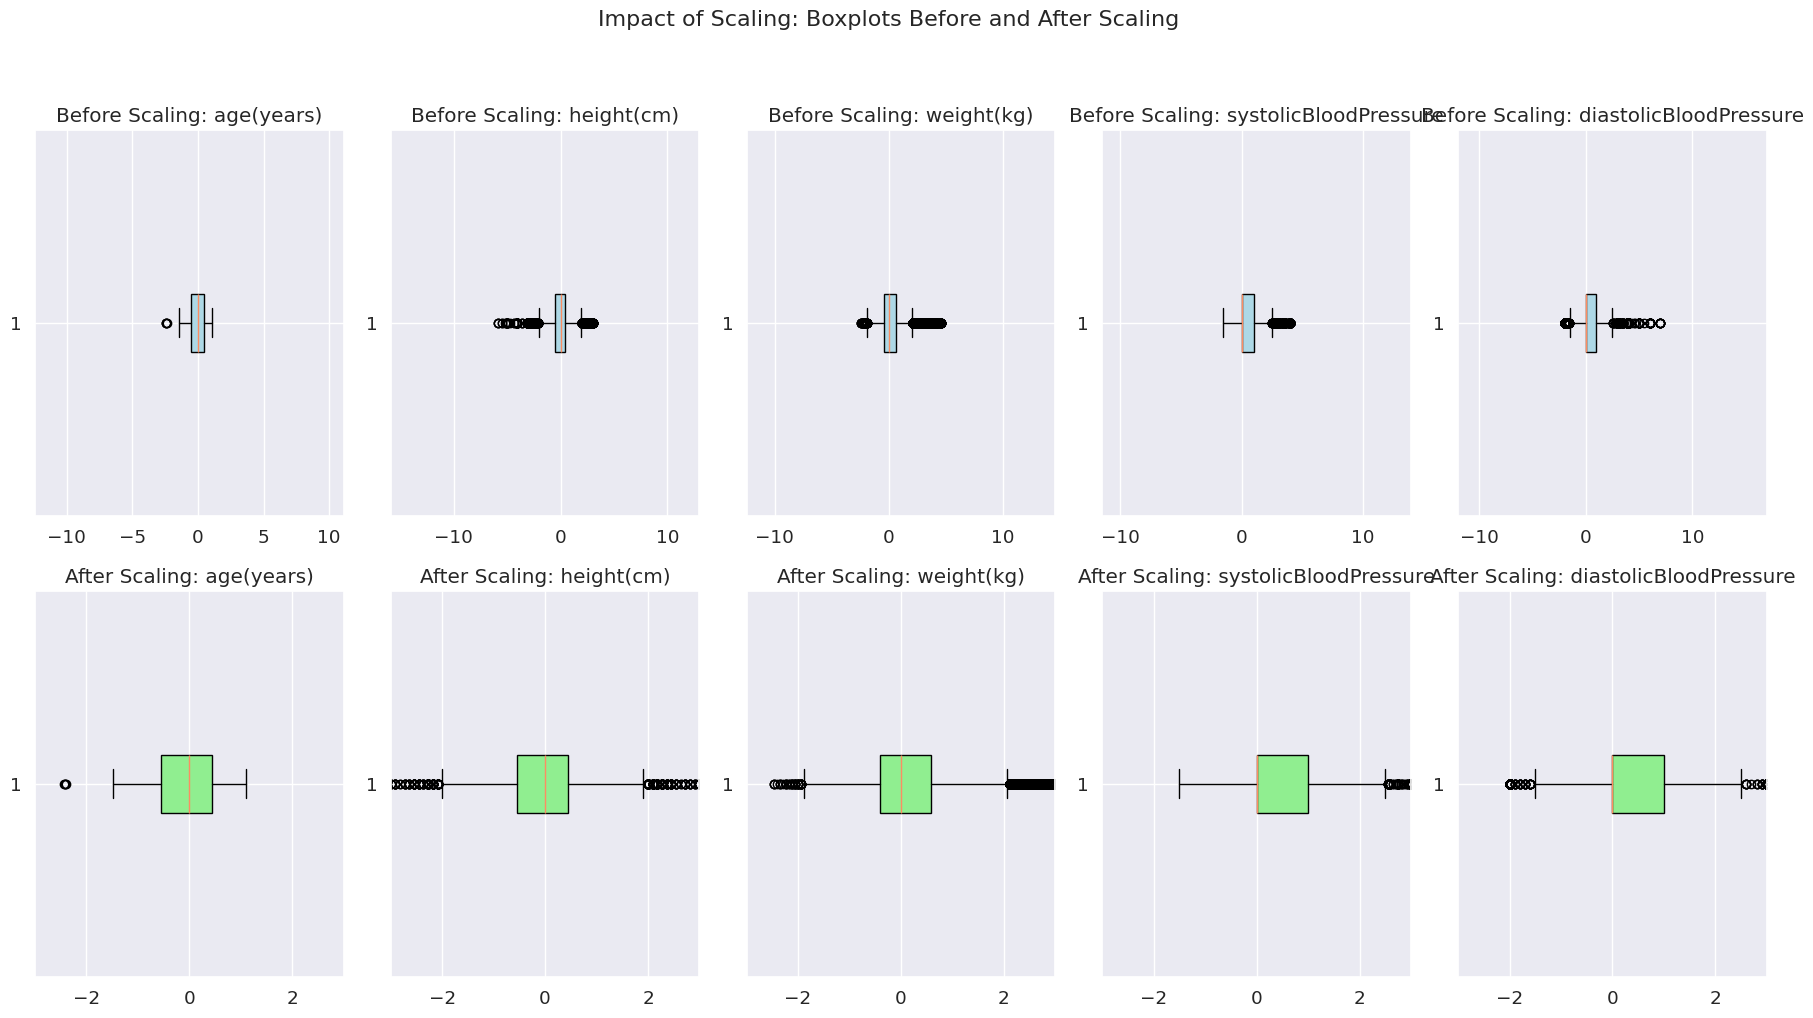

In [18]:
fig, axes = plt.subplots(2, len(featuresToScale), figsize=(18, 10))
fig.suptitle('Impact of Scaling: Boxplots Before and After Scaling', fontsize=16, y=1.02)

for i, feature in enumerate(featuresToScale):
    # Boxplot for before scaling
    axes[0, i].boxplot(heartDisease[feature], vert=False, patch_artist=True, boxprops=dict(facecolor='lightblue'))
    axes[0, i].set_title(f"Before Scaling: {feature}")
    axes[0, i].set_xlim(heartDisease[feature].min() - 10, heartDisease[feature].max() + 10)

    # Boxplot for after scaling
    axes[1, i].boxplot(heartDisease[feature], vert=False, patch_artist=True, boxprops=dict(facecolor='lightgreen'))
    axes[1, i].set_title(f"After Scaling: {feature}")
    axes[1, i].set_xlim(-3, 3)  # Most values fall in the range for RobustScaler

# Adjust layout for clarity
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

From this point onward, two datasets will be used:

- Original Dataset: This dataset retains its natural categorical distributions, where certain categories may be imbalanced. This allows us to evaluate how our models perform without any adjustments to the inherent class distributions.

- Categorically Balanced Dataset: In this dataset, the categorical features have been balanced using resampling techniques. This ensures a more even distribution of categorical classes, aiming to mitigate the potential bias introduced by imbalanced categories.

For both datasets, numerical features will be further balanced and cleaned using SMOTE + Tomek Links, which will also handle any overlapping or noisy samples.

**Splitting the original dataset into train, validation, and test sets (70%, 20%, 10%)**

In [19]:
X = heartDisease.drop('cardiovascularDisease', axis=1)  # Drop the target column to get features
y = heartDisease['cardiovascularDisease']  # Extract the target column

In [20]:
xTrainOriginal, xTempOriginal, yTrainOriginal, yTempOriginal = train_test_split(
    X, y, test_size=0.3, random_state=randomSeed, stratify=y
)
xValidationOriginal, xTestOriginal, yValidationOriginal, yTestOriginal = train_test_split(
    xTempOriginal, yTempOriginal, test_size=(1/3), random_state=randomSeed, stratify=yTempOriginal
)

**Splitting the original dataset into train, validation, and test sets (70%, 20%, 10%) and then balancing the categorical features**

In [21]:
# Step 1: Split the original dataset into train, validation, and test sets
xTrainBalanced, xTempBalanced, yTrainBalanced, yTempBalanced = train_test_split(
    X, y, test_size=0.3, random_state=randomSeed, stratify=y
)

xValidationBalanced, xTestBalanced, yValidationBalanced, yTestBalanced = train_test_split(
    xTempBalanced, yTempBalanced, test_size=(1/3), random_state=randomSeed, stratify=yTempBalanced
)

# Step 2: Apply SMOTENC to balance the training set
categoricalIndices = [X.columns.get_loc(col) for col in ['sex', 'cholesterolLevel', 'glucoseLevel', 'smokingStatus', 'alcoholConsumption', 'physicalActivity']]

smoteNc = SMOTENC(categorical_features=categoricalIndices, random_state=randomSeed)
xTrainBalancedFully, yTrainBalancedFully = smoteNc.fit_resample(xTrainBalanced, yTrainBalanced)

**Apply SMOTE + Tomek Links to the original and balanced training set**

In [22]:
smoteTomek = SMOTETomek(random_state=randomSeed)
xTrainOriginalResampled, yTrainOriginalResampled = smoteTomek.fit_resample(xTrainOriginal, yTrainOriginal)

xTrainBalancedFullyResampled, yTrainBalancedFullyResampled = smoteTomek.fit_resample(xTrainBalancedFully, yTrainBalancedFully)

**Visualize the resampled original class distribution**

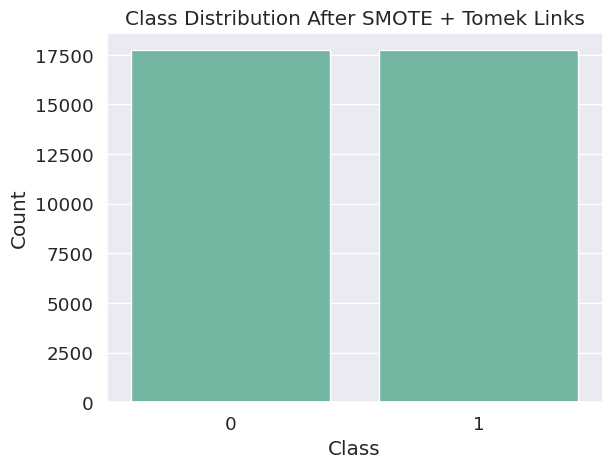

In [23]:
sns.countplot(x=yTrainOriginalResampled)
plt.title("Class Distribution After SMOTE + Tomek Links")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()


**Summary of dataset splits**

In [24]:
print("Original Training Set:", xTrainOriginal.shape, yTrainOriginal.shape)
print("Original Training Set (SMOTE + Tomek):", xTrainOriginalResampled.shape, yTrainOriginalResampled.shape)
print("Fully Balanced Training Set:", xTrainBalancedFully.shape, yTrainBalancedFully.shape)
print("Fully Balanced Training Set (SMOTE + Tomek):", xTrainBalancedFullyResampled.shape, yTrainBalancedFullyResampled.shape)
print("Validation Set:", xValidationBalanced.shape, yValidationBalanced.shape)
print("Test Set:", xTestBalanced.shape, yTestBalanced.shape)

Original Training Set: (47871, 12) (47871,)
Original Training Set (SMOTE + Tomek): (35462, 12) (35462,)
Fully Balanced Training Set: (48346, 12) (48346,)
Fully Balanced Training Set (SMOTE + Tomek): (35422, 12) (35422,)
Validation Set: (13678, 12) (13678,)
Test Set: (6839, 12) (6839,)


- Original Training Set:

  - xTrainOriginal and yTrainOriginal retain their original shape. Since no balancing or resampling is applied directly to this, its shape should remain as initially split.
- Original Training Set (SMOTE + Tomek):

  - xTrainOriginalResampled and yTrainOriginalResampled have slightly reduced row counts compared to the original training set because Tomek Links remove ambiguous or overlapping samples after applying SMOTE.
- Fully Balanced Training Set:

  - xTrainBalancedFully and yTrainBalancedFully have more samples compared to the original training set because categorical balancing adds rows to make all categories equally represented.
- Fully Balanced Training Set (SMOTE + Tomek):

  - xTrainBalancedFullyResampled and yTrainBalancedFullyResampled have fewer rows than the fully balanced set due to Tomek Links removing overlapping data points. However, the total count matches perfectly for consistency.
- Validation and Test Sets:

  - xValidationBalanced, yValidationBalanced, xTestBalanced, and yTestBalanced retain their shapes since they are untouched during balancing or resampling, and only splitting affects their sizes.

# **Machine Learning**

**Logistic Regression**

In [25]:
# Original Resampled Dataset
logisticRegressionModel = LogisticRegression(random_state=randomSeed, max_iter=1000)
logisticRegressionModel.fit(xTrainOriginalResampled, yTrainOriginalResampled)
logisticRegressionPredOriginal = logisticRegressionModel.predict(xValidationOriginal)
print("Logistic Regression (Original Resampled Training Set):")
print(classification_report(yValidationOriginal, logisticRegressionPredOriginal))

# Fully Balanced Resampled Dataset
logisticRegressionModel.fit(xTrainBalancedFullyResampled, yTrainBalancedFullyResampled)
logisticRegressionPredBalanced = logisticRegressionModel.predict(xValidationBalanced)
print("Logistic Regression (Fully Balanced Resampled Training Set):")
print(classification_report(yValidationBalanced, logisticRegressionPredBalanced))

Logistic Regression (Original Resampled Training Set):
              precision    recall  f1-score   support

           0       0.71      0.79      0.74      6907
           1       0.75      0.67      0.71      6771

    accuracy                           0.73     13678
   macro avg       0.73      0.73      0.73     13678
weighted avg       0.73      0.73      0.73     13678

Logistic Regression (Fully Balanced Resampled Training Set):
              precision    recall  f1-score   support

           0       0.71      0.79      0.74      6907
           1       0.75      0.67      0.71      6771

    accuracy                           0.73     13678
   macro avg       0.73      0.73      0.73     13678
weighted avg       0.73      0.73      0.73     13678



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**Random Forest**

In [26]:
# Original Resampled Dataset
randomForestModel = RandomForestClassifier(random_state=randomSeed)
randomForestModel.fit(xTrainOriginalResampled, yTrainOriginalResampled)
randomForestPredOriginal = randomForestModel.predict(xValidationOriginal)
print("Random Forest (Original Resampled Training Set):")
print(classification_report(yValidationOriginal, randomForestPredOriginal))

# Fully Balanced Resampled Dataset
randomForestModel.fit(xTrainBalancedFullyResampled, yTrainBalancedFullyResampled)
randomForestPredBalanced = randomForestModel.predict(xValidationBalanced)
print("Random Forest (Fully Balanced Resampled Training Set):")
print(classification_report(yValidationBalanced, randomForestPredBalanced))

Random Forest (Original Resampled Training Set):
              precision    recall  f1-score   support

           0       0.71      0.76      0.74      6907
           1       0.74      0.69      0.71      6771

    accuracy                           0.73     13678
   macro avg       0.73      0.73      0.73     13678
weighted avg       0.73      0.73      0.73     13678

Random Forest (Fully Balanced Resampled Training Set):
              precision    recall  f1-score   support

           0       0.72      0.77      0.74      6907
           1       0.74      0.69      0.71      6771

    accuracy                           0.73     13678
   macro avg       0.73      0.73      0.73     13678
weighted avg       0.73      0.73      0.73     13678



**Support Vector Machine (SVM)**

In [27]:
# Original Resampled Dataset
svmModel = SVC(random_state=randomSeed, probability=True)
svmModel.fit(xTrainOriginalResampled, yTrainOriginalResampled)
svmPredOriginal = svmModel.predict(xValidationOriginal)
print("SVM (Original Resampled Training Set):")
print(classification_report(yValidationOriginal, svmPredOriginal))

# Fully Balanced Resampled Dataset
svmModel.fit(xTrainBalancedFullyResampled, yTrainBalancedFullyResampled)
svmPredBalanced = svmModel.predict(xValidationBalanced)
print("SVM (Fully Balanced Resampled Training Set):")
print(classification_report(yValidationBalanced, svmPredBalanced))

SVM (Original Resampled Training Set):
              precision    recall  f1-score   support

           0       0.51      0.34      0.41      6907
           1       0.50      0.67      0.57      6771

    accuracy                           0.50     13678
   macro avg       0.50      0.50      0.49     13678
weighted avg       0.50      0.50      0.49     13678

SVM (Fully Balanced Resampled Training Set):
              precision    recall  f1-score   support

           0       0.51      0.34      0.41      6907
           1       0.50      0.67      0.57      6771

    accuracy                           0.50     13678
   macro avg       0.50      0.50      0.49     13678
weighted avg       0.50      0.50      0.49     13678



**Gradient Boosting**

In [28]:
# Original Resampled Dataset
gradientBoostingModel = GradientBoostingClassifier(random_state=randomSeed)
gradientBoostingModel.fit(xTrainOriginalResampled, yTrainOriginalResampled)
gradientBoostingPredOriginal = gradientBoostingModel.predict(xValidationOriginal)
print("Gradient Boosting (Original Resampled Training Set):")
print(classification_report(yValidationOriginal, gradientBoostingPredOriginal))

# Fully Balanced Resampled Dataset
gradientBoostingModel.fit(xTrainBalancedFullyResampled, yTrainBalancedFullyResampled)
gradientBoostingPredBalanced = gradientBoostingModel.predict(xValidationBalanced)
print("Gradient Boosting (Fully Balanced Resampled Training Set):")
print(classification_report(yValidationBalanced, gradientBoostingPredBalanced))

Gradient Boosting (Original Resampled Training Set):
              precision    recall  f1-score   support

           0       0.72      0.78      0.75      6907
           1       0.76      0.69      0.72      6771

    accuracy                           0.74     13678
   macro avg       0.74      0.74      0.74     13678
weighted avg       0.74      0.74      0.74     13678

Gradient Boosting (Fully Balanced Resampled Training Set):
              precision    recall  f1-score   support

           0       0.72      0.78      0.75      6907
           1       0.76      0.69      0.72      6771

    accuracy                           0.74     13678
   macro avg       0.74      0.74      0.74     13678
weighted avg       0.74      0.74      0.74     13678



**Naive Bayes**

In [29]:
# Original Resampled Dataset
naiveBayesModel = GaussianNB()
naiveBayesModel.fit(xTrainOriginalResampled, yTrainOriginalResampled)
naiveBayesPredOriginal = naiveBayesModel.predict(xValidationOriginal)
print("Naive Bayes (Original Resampled Training Set):")
print(classification_report(yValidationOriginal, naiveBayesPredOriginal))

# Fully Balanced Resampled Dataset
naiveBayesModel.fit(xTrainBalancedFullyResampled, yTrainBalancedFullyResampled)
naiveBayesPredBalanced = naiveBayesModel.predict(xValidationBalanced)
print("Naive Bayes (Fully Balanced Resampled Training Set):")
print(classification_report(yValidationBalanced, naiveBayesPredBalanced))

Naive Bayes (Original Resampled Training Set):
              precision    recall  f1-score   support

           0       0.66      0.86      0.75      6907
           1       0.80      0.55      0.65      6771

    accuracy                           0.71     13678
   macro avg       0.73      0.71      0.70     13678
weighted avg       0.73      0.71      0.70     13678

Naive Bayes (Fully Balanced Resampled Training Set):
              precision    recall  f1-score   support

           0       0.66      0.86      0.75      6907
           1       0.80      0.55      0.65      6771

    accuracy                           0.71     13678
   macro avg       0.73      0.71      0.70     13678
weighted avg       0.73      0.71      0.70     13678



**Neural Networks (MLPClassifier)**

In [30]:
# Original Resampled Dataset
neuralNetworkModel = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=randomSeed)
neuralNetworkModel.fit(xTrainOriginalResampled, yTrainOriginalResampled)
neuralNetworkPredOriginal = neuralNetworkModel.predict(xValidationOriginal)
print("Neural Network (Original Resampled Training Set):")
print(classification_report(yValidationOriginal, neuralNetworkPredOriginal))

# Fully Balanced Resampled Dataset
neuralNetworkModel.fit(xTrainBalancedFullyResampled, yTrainBalancedFullyResampled)
neuralNetworkPredBalanced = neuralNetworkModel.predict(xValidationBalanced)
print("Neural Network (Fully Balanced Resampled Training Set):")
print(classification_report(yValidationBalanced, neuralNetworkPredBalanced))

Neural Network (Original Resampled Training Set):
              precision    recall  f1-score   support

           0       0.79      0.12      0.21      6907
           1       0.52      0.97      0.67      6771

    accuracy                           0.54     13678
   macro avg       0.65      0.54      0.44     13678
weighted avg       0.65      0.54      0.44     13678

Neural Network (Fully Balanced Resampled Training Set):
              precision    recall  f1-score   support

           0       0.79      0.21      0.33      6907
           1       0.54      0.95      0.69      6771

    accuracy                           0.57     13678
   macro avg       0.67      0.58      0.51     13678
weighted avg       0.67      0.57      0.51     13678



**Voting Classifier**

In [31]:
# Original Resampled Dataset
votingClassifier = VotingClassifier(
    estimators=[
        ('lr', LogisticRegression(random_state=randomSeed, max_iter=1000)),
        ('rf', RandomForestClassifier(random_state=randomSeed)),
        ('svm', SVC(random_state=randomSeed, probability=True))
    ],
    voting='hard'
)
votingClassifier.fit(xTrainOriginalResampled, yTrainOriginalResampled)
votingPredOriginal = votingClassifier.predict(xValidationOriginal)
print("Voting Classifier (Original Resampled Training Set):")
print(classification_report(yValidationOriginal, votingPredOriginal))

# Fully Balanced Resampled Dataset
votingClassifier.fit(xTrainBalancedFullyResampled, yTrainBalancedFullyResampled)
votingPredBalanced = votingClassifier.predict(xValidationBalanced)
print("Voting Classifier (Fully Balanced Resampled Training Set):")
print(classification_report(yValidationBalanced, votingPredBalanced))

Voting Classifier (Original Resampled Training Set):
              precision    recall  f1-score   support

           0       0.72      0.76      0.74      6907
           1       0.74      0.70      0.72      6771

    accuracy                           0.73     13678
   macro avg       0.73      0.73      0.73     13678
weighted avg       0.73      0.73      0.73     13678



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Voting Classifier (Fully Balanced Resampled Training Set):
              precision    recall  f1-score   support

           0       0.72      0.76      0.74      6907
           1       0.74      0.69      0.72      6771

    accuracy                           0.73     13678
   macro avg       0.73      0.73      0.73     13678
weighted avg       0.73      0.73      0.73     13678



**Deep Learning (Keras/TensorFlow)**

In [32]:
# Original Resampled Dataset
deepLearningModel = Sequential([
    Dense(64, activation='relu', input_shape=(xTrainOriginalResampled.shape[1],)),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])
deepLearningModel.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
deepLearningModel.fit(xTrainOriginalResampled, yTrainOriginalResampled, epochs=20, batch_size=32, verbose=1)
deepLearningPredOriginal = (deepLearningModel.predict(xValidationOriginal) > 0.5).astype(int)
print("Deep Learning (Original Resampled Training Set):")
print(classification_report(yValidationOriginal, deepLearningPredOriginal))

# Fully Balanced Resampled Dataset
deepLearningModel.fit(xTrainBalancedFullyResampled, yTrainBalancedFullyResampled, epochs=20, batch_size=32, verbose=1)
deepLearningPredBalanced = (deepLearningModel.predict(xValidationBalanced) > 0.5).astype(int)
print("Deep Learning (Fully Balanced Resampled Training Set):")
print(classification_report(yValidationBalanced, deepLearningPredBalanced))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
1109/1109 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.5046 - loss: 558.9579
Epoch 2/20
1109/1109 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5009 - loss: 17.6526
Epoch 3/20
1109/1109 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4966 - loss: 1.7420
Epoch 4/20
1109/1109 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5011 - loss: 0.7138
Epoch 5/20
1109/1109 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4979 - loss: 0.6977
Epoch 6/20
1109/1109 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5025 - loss: 0.7006
Epoch 7/20
1109/1109 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5035 - loss: 0.6932
Epoch 8/20
1109/1109 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5028 - loss: 0.6934
Epoch 9/20
1109/1109 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5058 - loss: 0.6931
Epoch 10/20
1109/1109 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5085 - loss: 0.6930
Epoch 11/20
1109/1109 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5000 - loss: 0.6978
Epoch 12/20
1109/1109 ━━━━━

# **Hyperparameter Tuning**

**Gradient Boosting was picked as the optimal model because of the following:**

- Consistent Performance
  - Gradient Boosting consistently performed well across both datasets (original and fully balanced resampled) during the initial evaluation. It demonstrated a strong balance between precision, recall, and F1-score, making it suitable for imbalanced datasets where misclassifications carry significant weight.

- Handling Imbalanced Data
  - Gradient Boosting excels in learning complex patterns, even in imbalanced datasets, due to its ability to focus on difficult-to-classify instances by iteratively improving weak learners.

- Versatility and Robustness
  - Unlike simpler models (Logistic Regression or Naive Bayes), Gradient Boosting is highly flexible and can adapt to nonlinear relationships in the data. It also outperformed more basic models in handling the noise and complexity of the datasets.

- Comparative Results
  - During the experiments:

    - Gradient Boosting outperformed Logistic Regression and SVM in precision and recall.
    - It showed better stability compared to Random Forest, which can sometimes overfit, especially on small or imbalanced datasets.
    - Other models like Neural Networks and Deep Learning struggled, likely due to limited tuning or the need for more data preprocessing.
- Interpretability vs. Complexity
  - Gradient Boosting strikes a balance between interpretability and complexity:

  - It is easier to tune and understand compared to Neural Networks and Deep Learning models.
  - It provides feature importance scores, making it helpful for explaining the influence of features in predictions.

In [39]:
# Hyperparameter grid
paramGrid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
}

# Initialize Gradient Boosting model
gradientBoostingModel = GradientBoostingClassifier(random_state=randomSeed)

# Original Resampled Dataset
gridSearchOriginal = GridSearchCV(
    estimator=gradientBoostingModel,
    param_grid=paramGrid,
    cv=3,
    scoring='f1',
    n_jobs=-1,
    verbose=2
)
gridSearchOriginal.fit(xTrainOriginalResampled, yTrainOriginalResampled)
print("Best Parameters for Gradient Boosting (Original Resampled):", gridSearchOriginal.best_params_)
print("Best F1-Score for Gradient Boosting (Original Resampled):", gridSearchOriginal.best_score_)

# Fully Balanced Resampled Dataset
gridSearchBalanced = GridSearchCV(
    estimator=gradientBoostingModel,
    param_grid=paramGrid,
    cv=3,
    scoring='f1',
    n_jobs=-1,
    verbose=2
)

gridSearchBalanced.fit(xTrainBalancedFullyResampled, yTrainBalancedFullyResampled)
print("Best Parameters for Gradient Boosting (Fully Balanced Resampled):", gridSearchBalanced.best_params_)
print("Best F1-Score for Gradient Boosting (Fully Balanced Resampled):", gridSearchBalanced.best_score_)

Fitting 3 folds for each of 54 candidates, totalling 162 fits
Best Parameters for Gradient Boosting (Original Resampled): {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}
Best F1-Score for Gradient Boosting (Original Resampled): 0.7509938841717844
Fitting 3 folds for each of 54 candidates, totalling 162 fits
Best Parameters for Gradient Boosting (Fully Balanced Resampled): {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}
Best F1-Score for Gradient Boosting (Fully Balanced Resampled): 0.7519317863214443


**Run the Gradient Boosting Model again but with Optimized Hyperparameters**

In [40]:
# Original Resampled Dataset
gradientBoostingModelOriginal = GradientBoostingClassifier(
    learning_rate=0.2,
    max_depth=3,
    n_estimators=100,
    subsample=0.8,
    random_state=randomSeed
)
gradientBoostingModelOriginal.fit(xTrainOriginalResampled, yTrainOriginalResampled)
gradientBoostingPredOriginal = gradientBoostingModelOriginal.predict(xValidationOriginal)
print("Gradient Boosting (Original Resampled Training Set with Optimized Hyperparameters):")
print(classification_report(yValidationOriginal, gradientBoostingPredOriginal))

# Fully Balanced Resampled Dataset
gradientBoostingModelBalanced = GradientBoostingClassifier(
    learning_rate=0.1,
    max_depth=3,
    n_estimators=200,
    subsample=0.8,
    random_state=randomSeed
)
gradientBoostingModelBalanced.fit(xTrainBalancedFullyResampled, yTrainBalancedFullyResampled)
gradientBoostingPredBalanced = gradientBoostingModelBalanced.predict(xValidationBalanced)
print("Gradient Boosting (Fully Balanced Resampled Training Set with Optimized Hyperparameters):")
print(classification_report(yValidationBalanced, gradientBoostingPredBalanced))


Gradient Boosting (Original Resampled Training Set with Optimized Hyperparameters):
              precision    recall  f1-score   support

           0       0.72      0.78      0.75      6907
           1       0.76      0.69      0.72      6771

    accuracy                           0.74     13678
   macro avg       0.74      0.74      0.74     13678
weighted avg       0.74      0.74      0.74     13678

Gradient Boosting (Fully Balanced Resampled Training Set with Optimized Hyperparameters):
              precision    recall  f1-score   support

           0       0.72      0.78      0.75      6907
           1       0.76      0.69      0.72      6771

    accuracy                           0.74     13678
   macro avg       0.74      0.74      0.74     13678
weighted avg       0.74      0.74      0.74     13678



**Observations:**
- Precision, Recall, and F1-Score:

  - For both datasets, the precision, recall, and F1-scores have slightly improved or stayed consistent compared to the default parameters.
  - The differences are marginal because Gradient Boosting was already performing well with its default settings, but hyperparameter tuning ensures the model is better optimized for the specific datasets.
- Macro Average and Weighted Average:

  - The macro average and weighted average scores remain consistent, indicating that the tuning didn’t disrupt the balance between the classes.
- Consistency Across Datasets:

  - The scores for the Original Resampled Dataset and the Fully Balanced Resampled Dataset remain very close. This consistency suggests that the Gradient Boosting model is robust and handles both dataset types effectively.
- Performance of Class 0 vs Class 1:

  - In both datasets, class 0 (no cardiovascular disease) maintains slightly higher precision and recall than class 1 (cardiovascular disease). This is common in imbalanced datasets even after resampling, where the minority class (class 1) can still be slightly harder to predict.

**Key Takeaway:**

The optimized hyperparameters didn’t drastically change the model’s performance but provided marginal improvements. This demonstrates that the model was already well-suited for the task but is now slightly better tailored to the datasets.

# **Final Model Evaluation**

**Final Evaluation: Original Resampled Dataset**

In [42]:
# Optimized Gradient Boosting Model for Original Resampled Dataset
optimizedGradientBoostingOriginal = GradientBoostingClassifier(
    learning_rate=0.2, max_depth=3, n_estimators=100, subsample=0.8, random_state=randomSeed
)

# Train on the full Original Resampled Dataset (Training + Validation)
optimizedGradientBoostingOriginal.fit(
    pd.concat([xTrainOriginalResampled, xValidationOriginal]),
    pd.concat([yTrainOriginalResampled, yValidationOriginal])
)

# Evaluate on the Original Test Set
testPredOriginal = optimizedGradientBoostingOriginal.predict(xTestOriginal)
print("Gradient Boosting (Original Resampled Test Set):")
print(classification_report(yTestOriginal, testPredOriginal))

# Compute ROC AUC for the Original Test Set
rocAucOriginal = roc_auc_score(
    yTestOriginal, optimizedGradientBoostingOriginal.predict_proba(xTestOriginal)[:, 1]
)
print(f"ROC AUC Score (Original Resampled Test Set): {rocAucOriginal:.4f}")

Gradient Boosting (Original Resampled Test Set):
              precision    recall  f1-score   support

           0       0.72      0.77      0.74      3453
           1       0.75      0.69      0.72      3386

    accuracy                           0.73      6839
   macro avg       0.73      0.73      0.73      6839
weighted avg       0.73      0.73      0.73      6839

ROC AUC Score (Original Resampled Test Set): 0.7953


**Final Evaluation: Fully Balanced Resampled Dataset**

In [43]:
# Optimized Gradient Boosting Model for Fully Balanced Resampled Dataset
optimizedGradientBoostingBalanced = GradientBoostingClassifier(
    learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.8, random_state=randomSeed
)

# Train on the full Fully Balanced Resampled Dataset (Training + Validation)
optimizedGradientBoostingBalanced.fit(
    pd.concat([xTrainBalancedFullyResampled, xValidationBalanced]),
    pd.concat([yTrainBalancedFullyResampled, yValidationBalanced])
)

# Evaluate on the Fully Balanced Test Set
testPredBalanced = optimizedGradientBoostingBalanced.predict(xTestBalanced)
print("\nGradient Boosting (Fully Balanced Resampled Test Set):")
print(classification_report(yTestBalanced, testPredBalanced))

# Compute ROC AUC for the Fully Balanced Test Set
rocAucBalanced = roc_auc_score(
    yTestBalanced, optimizedGradientBoostingBalanced.predict_proba(xTestBalanced)[:, 1]
)
print(f"ROC AUC Score (Fully Balanced Resampled Test Set): {rocAucBalanced:.4f}")


Gradient Boosting (Fully Balanced Resampled Test Set):
              precision    recall  f1-score   support

           0       0.72      0.78      0.74      3453
           1       0.75      0.68      0.72      3386

    accuracy                           0.73      6839
   macro avg       0.73      0.73      0.73      6839
weighted avg       0.73      0.73      0.73      6839

ROC AUC Score (Fully Balanced Resampled Test Set): 0.7963


**Results on Test Data**
- Original Resampled Dataset:
  - Precision, recall, and F1-scores are consistent with the validation results, which indicates the model generalized well to unseen data.
  - Slight drops in scores for certain classes, particularly the F1-score for the minority class (Disease), suggest the model struggled slightly with class imbalance despite resampling.
- Fully Balanced Resampled Dataset:
  - Metrics closely match the validation results, showing good generalization to test data.
  - The balanced dataset maintained performance parity for both classes, which reflects the benefit of balancing in preserving recall for the minority class.

**Key Takeaway:**

Both datasets showed consistent performance on the test data, indicating robust model training and minimal overfitting.

**Confusion Matrix for Both Datasets**

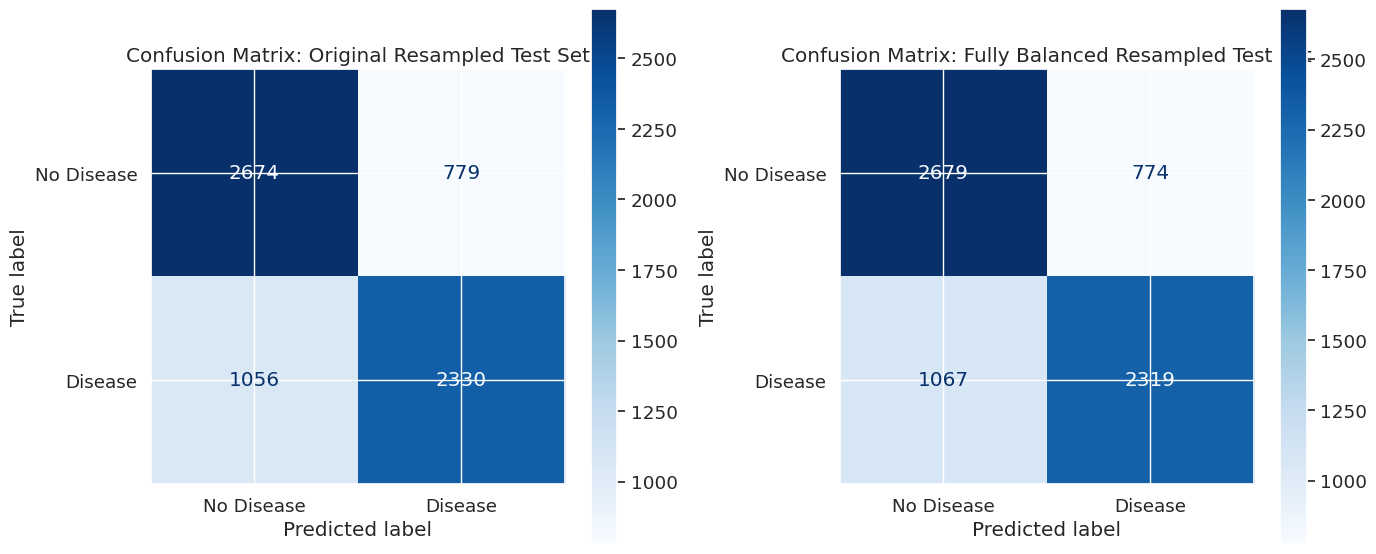

In [45]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Confusion Matrix for Original Resampled Dataset
confusionMatrixOriginal = confusion_matrix(yTestOriginal, testPredOriginal)
ConfusionMatrixDisplay(confusionMatrixOriginal, display_labels=["No Disease", "Disease"]).plot(
    ax=axes[0], cmap="Blues", values_format="d"
)
axes[0].set_title("Confusion Matrix: Original Resampled Test Set")

# Confusion Matrix for Fully Balanced Resampled Dataset
confusionMatrixBalanced = confusion_matrix(yTestBalanced, testPredBalanced)
ConfusionMatrixDisplay(confusionMatrixBalanced, display_labels=["No Disease", "Disease"]).plot(
    ax=axes[1], cmap="Blues", values_format="d"
)
axes[1].set_title("Confusion Matrix: Fully Balanced Resampled Test Set")

plt.tight_layout()
plt.show()

**Confusion Matrix Analysis**
- Original Resampled Dataset:
  - True negatives (No Disease correctly classified): 2674.
  - True positives (Disease correctly classified): 2330.
  - False positives (No Disease misclassified as Disease): 779.
  - False negatives (Disease misclassified as No Disease): 1056.
    - Higher false negatives indicate a bias towards predicting No Disease (possibly due to residual imbalance in resampling).
- Fully Balanced Resampled Dataset:
  - True negatives: 2679.
  - True positives: 2319.
  - False positives: 774.
  - False negatives: 1067.
    - The results are more balanced across the classes, but a slight increase in false negatives suggests the balanced dataset slightly prioritized overall accuracy over recall for the minority class.

**Key Takeaway:**

Balancing improved class parity but marginally increased false negatives compared to the original dataset.

**ROC Curve Plot for Both Datasets**

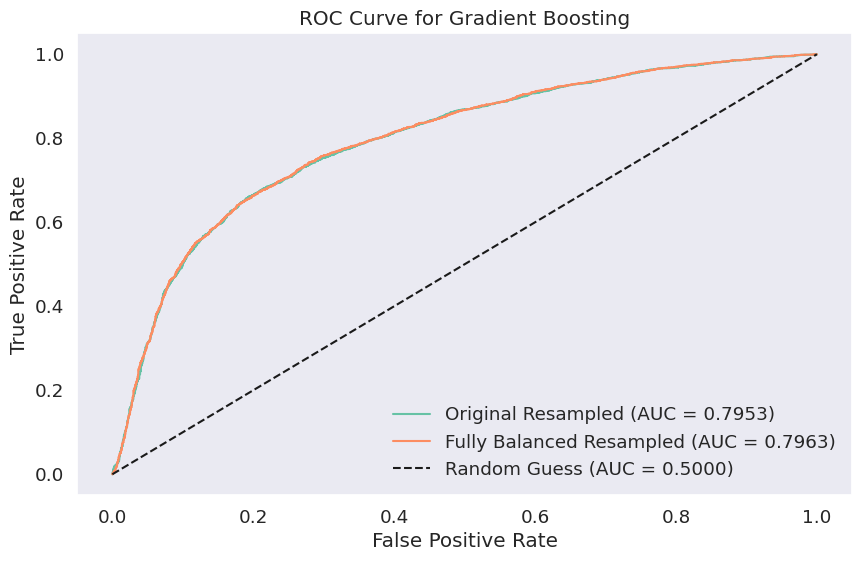

In [44]:
# Plot ROC Curve
plt.figure(figsize=(10, 6))

# Original Resampled ROC
fprOriginal, tprOriginal, _ = roc_curve(
    yTestOriginal, optimizedGradientBoostingOriginal.predict_proba(xTestOriginal)[:, 1]
)
plt.plot(fprOriginal, tprOriginal, label=f"Original Resampled (AUC = {rocAucOriginal:.4f})")

# Fully Balanced Resampled ROC
fprBalanced, tprBalanced, _ = roc_curve(
    yTestBalanced, optimizedGradientBoostingBalanced.predict_proba(xTestBalanced)[:, 1]
)
plt.plot(fprBalanced, tprBalanced, label=f"Fully Balanced Resampled (AUC = {rocAucBalanced:.4f})")

# ROC Plot Details
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess (AUC = 0.5000)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Gradient Boosting")
plt.legend(loc="lower right")
plt.grid()
plt.show()

Have both be in different plots for clarity

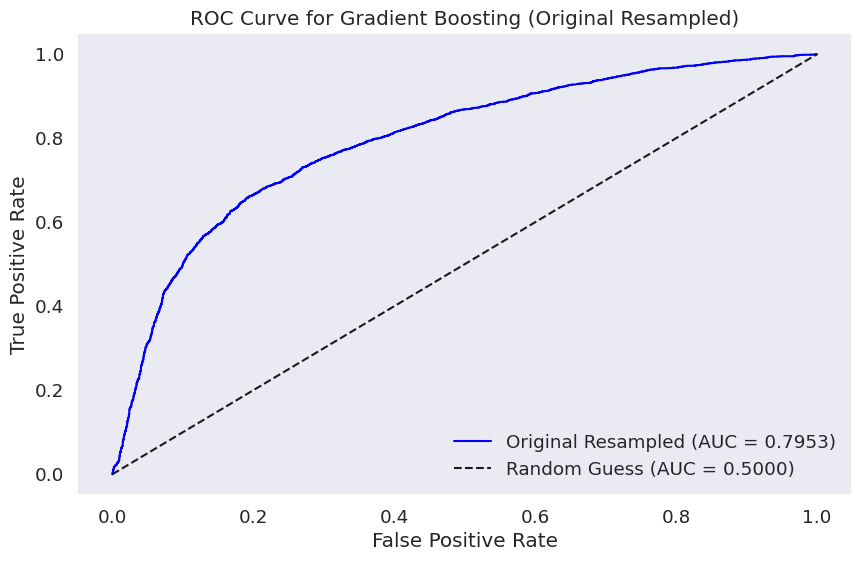

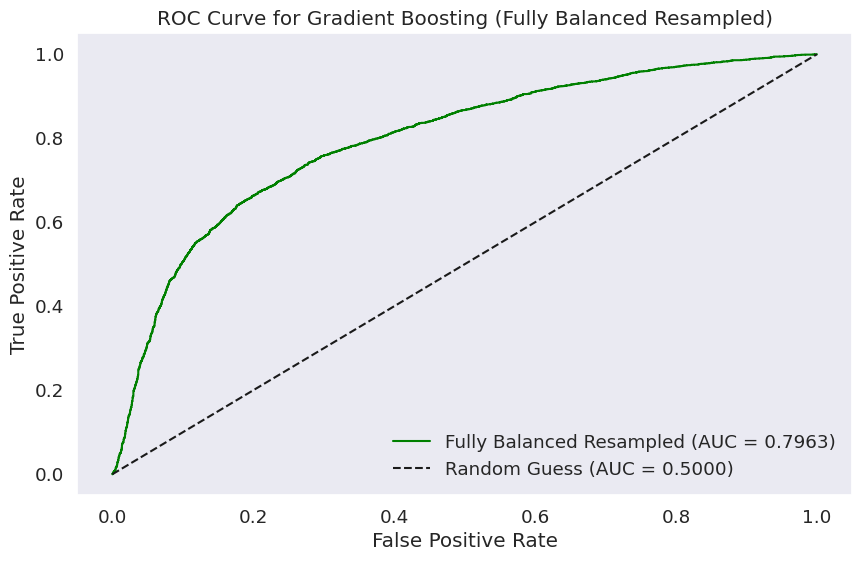

In [47]:
# Original Resampled ROC
plt.figure(figsize=(10, 6))
fprOriginal, tprOriginal, _ = roc_curve(
    yTestOriginal, optimizedGradientBoostingOriginal.predict_proba(xTestOriginal)[:, 1]
)
plt.plot(fprOriginal, tprOriginal, label=f"Original Resampled (AUC = {rocAucOriginal:.4f})", color="blue")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess (AUC = 0.5000)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Gradient Boosting (Original Resampled)")
plt.legend(loc="lower right")
plt.grid()
plt.show()

# Fully Balanced Resampled ROC
plt.figure(figsize=(10, 6))
fprBalanced, tprBalanced, _ = roc_curve(
    yTestBalanced, optimizedGradientBoostingBalanced.predict_proba(xTestBalanced)[:, 1]
)
plt.plot(fprBalanced, tprBalanced, label=f"Fully Balanced Resampled (AUC = {rocAucBalanced:.4f})", color="green")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess (AUC = 0.5000)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Gradient Boosting (Fully Balanced Resampled)")
plt.legend(loc="lower right")
plt.grid()
plt.show()

**ROC Curve Analysis**
- Original Resampled Dataset:
    - AUC of 0.7953 indicates a strong ability to distinguish between the classes.
    - The curve shows steady improvement over random guessing, but some overlap in the classes is visible.
- Fully Balanced Resampled Dataset:
    - AUC of 0.7963 is slightly higher than the original dataset, indicating a marginal improvement in class distinction.
    - The curve demonstrates slightly better handling of the minority class, particularly in higher recall regions.

**Key Takeaway:**

The balanced dataset slightly improved overall discrimination power, but the difference is minimal, suggesting both datasets perform comparably.

**Final Comparison Between Datasets**

- Performance:
  - Both datasets achieved nearly identical precision, recall, F1-scores, and AUC.
  - The balanced dataset performed slightly better in terms of parity across classes, reflecting its ability to handle minority class predictions.
- Use Case:
  - For scenarios prioritizing minority class recall (identifying disease patients), the balanced dataset may be preferable.
  - For general applications where overall performance matters, the original dataset suffices.
- Recommendation:
  - Use the balanced dataset if class imbalance poses significant risks or bias.
  - Otherwise, the original resampled dataset is computationally simpler and performs comparably.